In [2]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
raw_data = pd.read_csv('kc_house_data.csv')
df = raw_data.copy()
df.drop(['date'], axis=1, inplace=True)

In [3]:
#df.drop(['id'],axis=1, inplace=True)
#print(df.at[0, 'bedrooms'])
#x = {}
#for i in range(len(df['id'])):
#    if df.at[i, 'id'] not in x: 
#        x[df.at[i, 'id']] = 1
#    else:
#        x[df.at[i, 'id']] += 1
#for i in x.keys():
#    if x[i] > 1:
#        print(i, x[i])


21613
21613


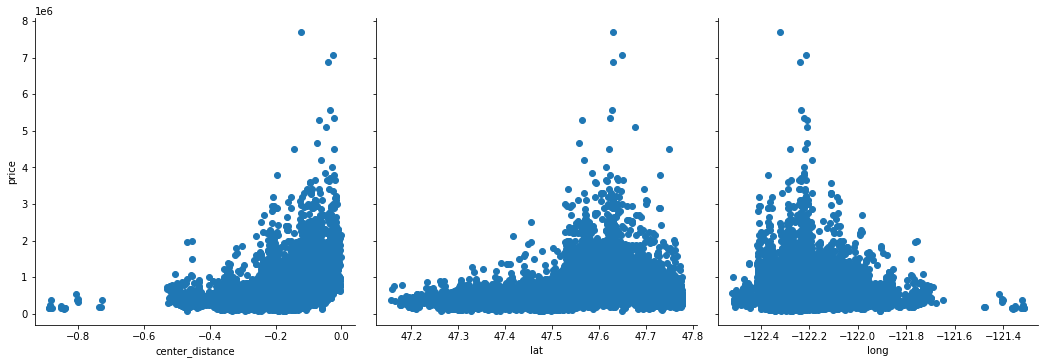

<Figure size 432x288 with 0 Axes>

In [4]:
latSqrdList = [0]*len(df['lat'])
print(len(df['lat']))
latcenter = 47.63
longcenter = -122.2
for i in range(len(df['lat'])):
    latSqrdList[i] += (df.at[i, 'lat'] - latcenter) ** 2
    latSqrdList[i] += (df.at[i, 'long'] - longcenter) ** 2
    latSqrdList[i] = -(latSqrdList[i] ** 0.5)

print(len(latSqrdList))
df['center_distance'] = latSqrdList

df.head()

new = sns.PairGrid(df, x_vars=['center_distance', 'lat', 'long'], y_vars=[
                   'price'], height=5, aspect=1)
new.map(plt.scatter)
plt.show()
#plt.savefig("../figures/center-distance.png")

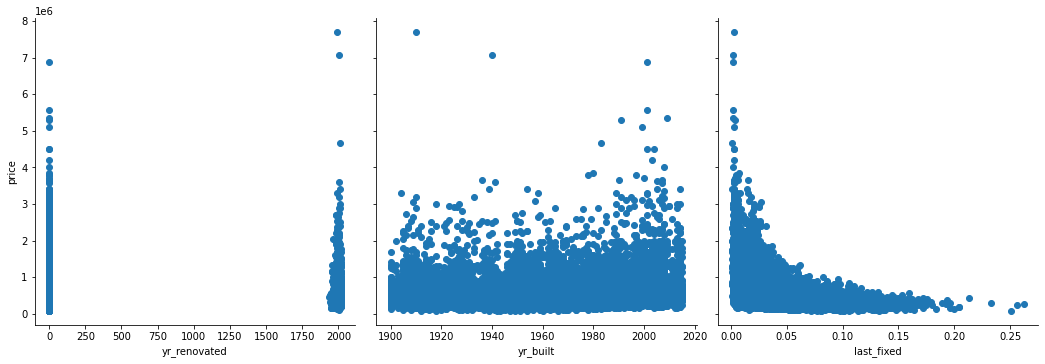

In [4]:

lastFixedList = [0]*len(df['yr_renovated'])
for i in range(len(df['yr_built'])):
    lastFixedList[i] = (2020- max(df.at[i, 'yr_built'], df.at[i, 'yr_renovated'])) / df.at[i, 'sqft_living']

df['last_fixed'] = lastFixedList

df.head()

new=sns.PairGrid(df,x_vars=['yr_renovated', 'yr_built', 'last_fixed'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()

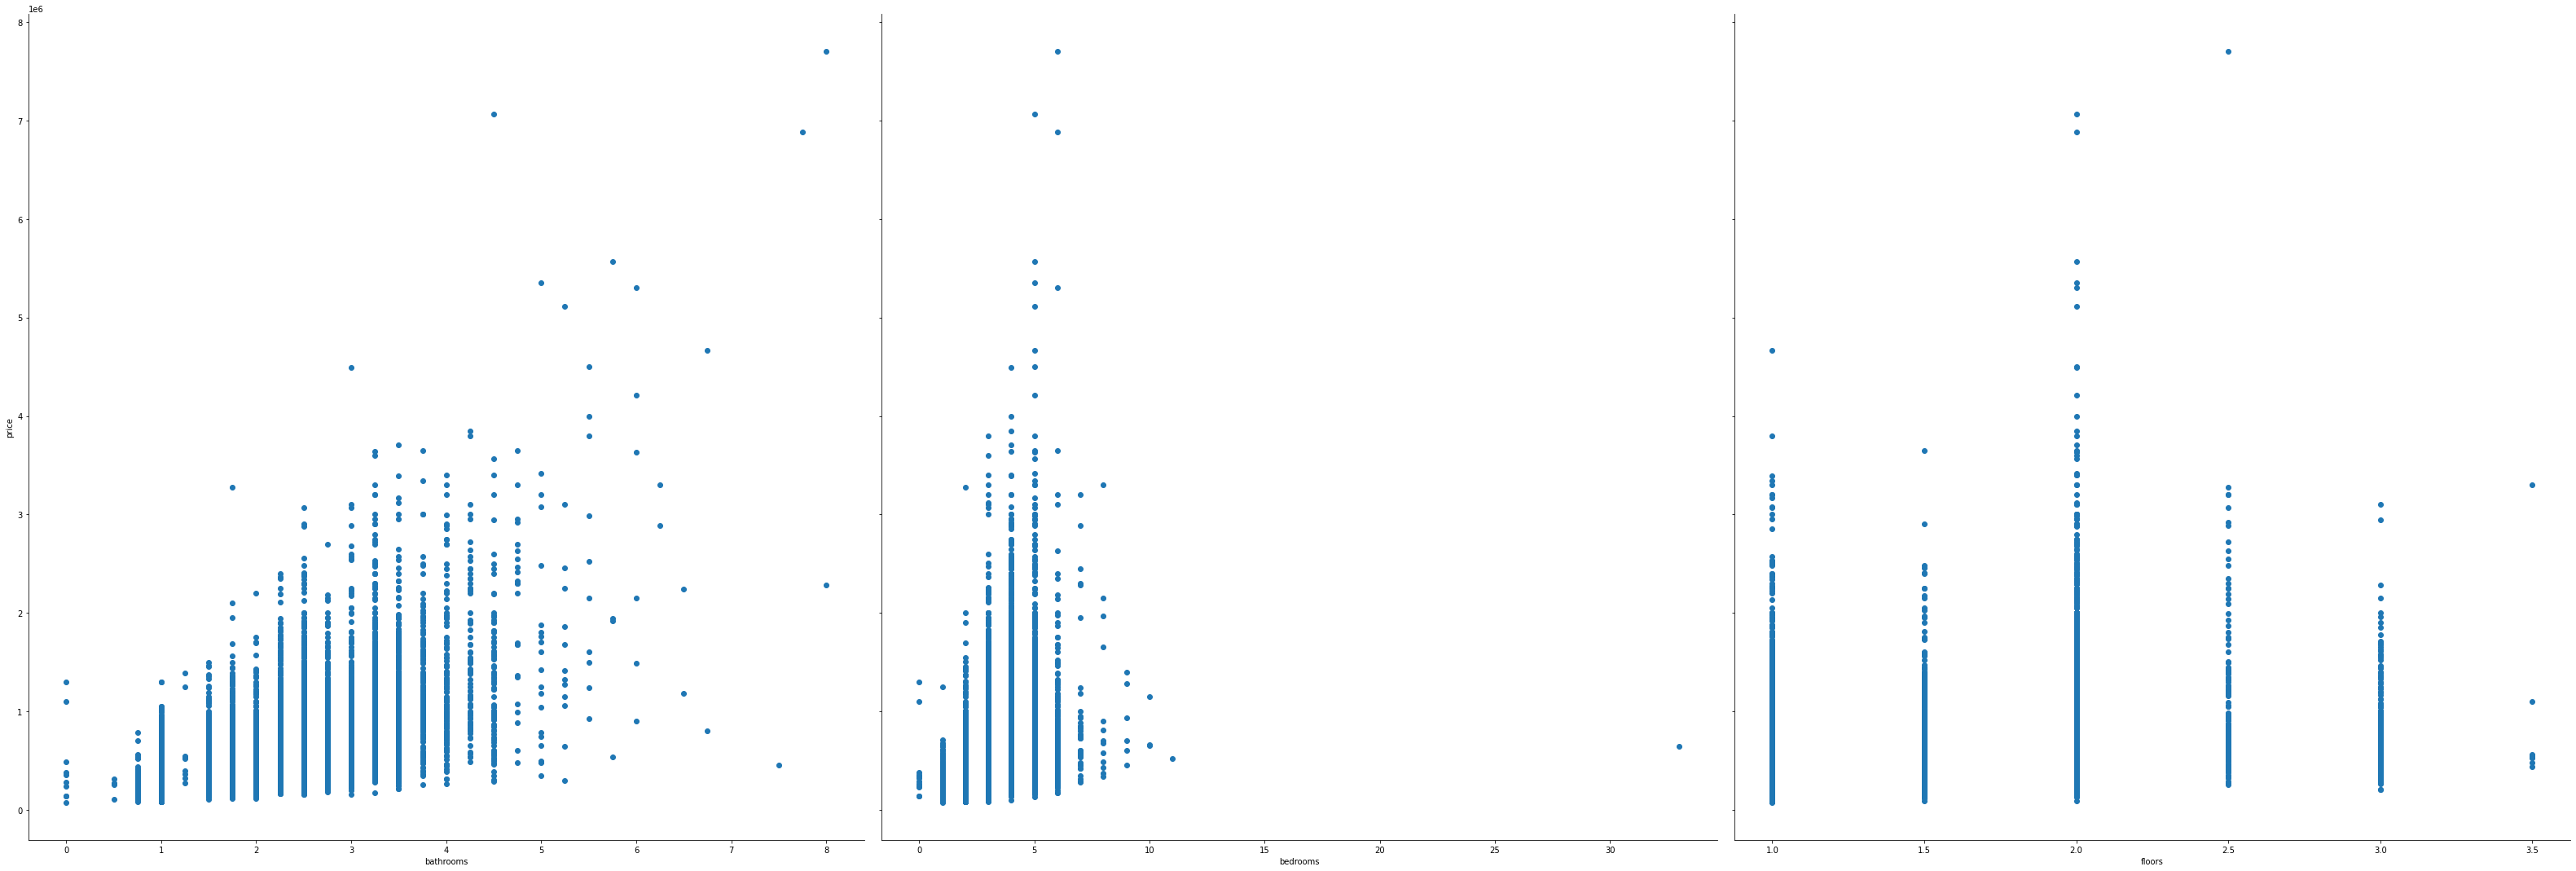

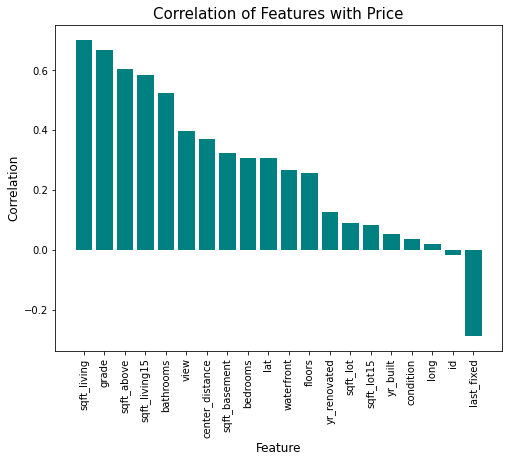

In [5]:
cor = df.corr()['price'].sort_values(
    ascending=False).drop(['price', 'zipcode'])
new = sns.PairGrid(df, x_vars=['bathrooms', 'bedrooms', 'floors'], y_vars=[
                   'price'], height=15, aspect=1)
new.map(plt.scatter)
plt.show()
plt.figure(figsize=(8, 6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

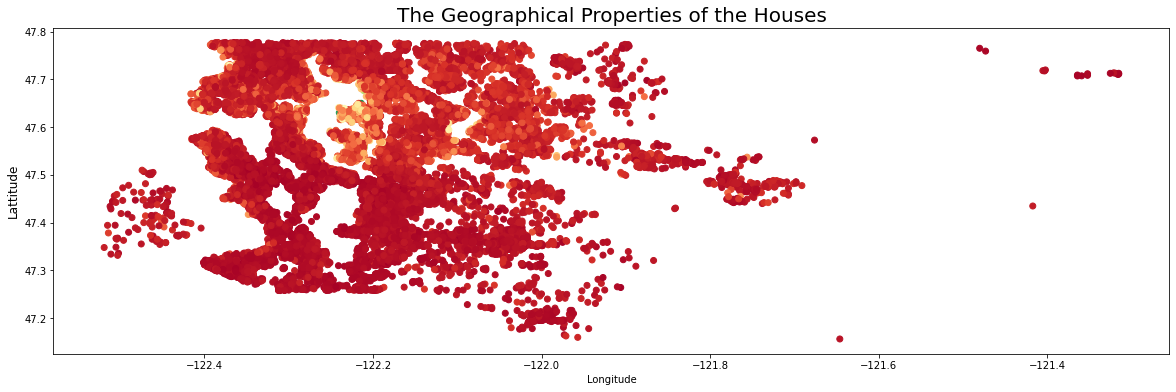

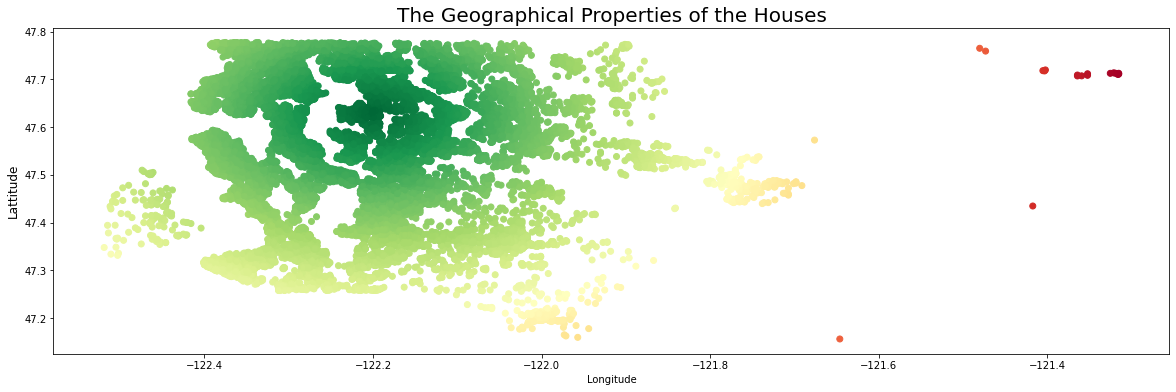

In [6]:
plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(x='long',y='lat',data=df, c='center_distance',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=20)
plt.show()

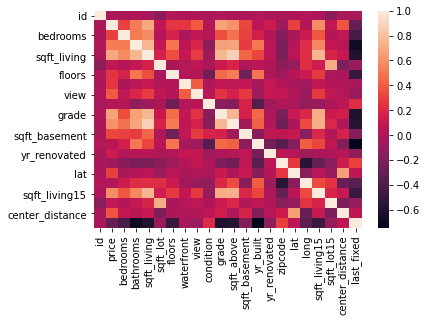

In [7]:
sns.heatmap(df.corr())
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df['last_fixed'] = lastFixedList

print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))
print(df.mean(axis=0))
print(df.std(axis=0))
        

[ 1.14407473e-16 -3.68207960e-17  2.36705117e-16 -1.78843866e-16
  2.41965231e-16  1.05202274e-17 -3.15606823e-17 -5.26011371e-18
 -1.05202274e-17 -2.57745572e-16  2.52485458e-16  1.10462388e-16
  6.83814783e-17  1.91468139e-15  1.31502843e-18 -8.96214887e-14
 -3.44626213e-14 -3.63684262e-14  8.15317626e-17 -2.89306254e-17
 -6.37788788e-17  3.15606823e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
id                 4.580302e+09
price              5.400881e+05
bedrooms           3.370842e+00
bathrooms          2.114757e+00
sqft_living        2.079900e+03
sqft_lot           1.510697e+04
floors             1.494309e+00
waterfront         7.541757e-03
view               2.343034e-01
condition          3.409430e+00
grade              7.656873e+00
sqft_above         1.788391e+03
sqft_basement      2.915090e+02
yr_built           1.971005e+03
yr_renovated       8.440226e+01
zipcode            9.807794e+04
lat                4.756005e+01
long              -1.222139e+

In [9]:
"""x_var = []
y_var = []
means = {}
stds = {}
for e in df.keys():
    means[e] = df.mean(axis=0)[e]
    stds[e] = df.std(axis=0)[e]
for i in range(len(df['id'])):
#for i in range(100):
    tempList = []
    for e in df.keys():
        if(e == 'price'):
            y_var.append(df[e][i])
        else:
            tempList.append((df[e][i] - means[e]) / stds[e])
    x_var.append(tempList)
theta = [1] * len(x_var[0]) """

"x_var = []\ny_var = []\nmeans = {}\nstds = {}\nfor e in df.keys():\n    means[e] = df.mean(axis=0)[e]\n    stds[e] = df.std(axis=0)[e]\nfor i in range(len(df['id'])):\n#for i in range(100):\n    tempList = []\n    for e in df.keys():\n        if(e == 'price'):\n            y_var.append(df[e][i])\n        else:\n            tempList.append((df[e][i] - means[e]) / stds[e])\n    x_var.append(tempList)\ntheta = [1] * len(x_var[0]) "

# Decision Tree 

In [10]:
# Decision tree

# Copy dataset
dataset = raw_data.copy()

# Combine features
dataset['center_distance'] = latSqrdList
dataset['last_fixed'] = lastFixedList

# Drop combined and useless columns
dataset.drop(['id', 'date', 'yr_renovated', 'yr_built', 'lat', 'long'],axis=1, inplace=True)



In [11]:
# Remove outliers
from scipy import stats
#dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

In [12]:
# from sklearn.preprocessing import StandardScaler
# Normalize values
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
#scaled_reverse = scaler.inverse_transform(dataset)
#df_scaled_reverse = pd.DataFrame(scaled_reverse, columns=dataset.columns)
df_norm = pd.DataFrame(dataset_scaled, columns=dataset.columns)
# Check if data is normalized
#print(df_norm.head)
#print(df_norm.mean(axis=0))
#print(df_norm.std(axis=0))
#print(df_norm.mean(axis=0))
#print(df_norm.std(axis=0))

X = dataset.iloc[:,1:] # Splice dataframe: All items along 0-axis (values) 
# and all attributes along 1-axis, except index 1, which is price
Y = dataset.iloc[:,0] # All values along 0-axis and, but only the price column
X_scaler = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_scaler, columns=X.columns)
#Y_scaler = scaler.fit_transform(Y)

# Split data into training data and test data
X_training, X_test, Y_training, Y_test = train_test_split(X_norm,Y, test_size=0.2, random_state=0)

In [13]:
#print(dataset.iloc[:,1:])
#print(dataset.iloc[:,0:2])
# kombinere størst av yr_year_fixed lst_fixed
# 

### Hyperparameter tuning with GridSearchCV

In [14]:
#from sklearn.metrics import mean_squared_error
#def root_mean_squared_error(y_true, y_pred):
#    ''' Root mean squared error regression loss
#    
#    Parameters
#    ----------
#    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
#    Ground truth (correct) target values.
#
#    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
#    Estimated target values.
#    '''
    #return np.sqrt(mean_squared_error(y_true, y_pred))

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import tree

#from sklearn.metrics import make_scorer

#rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

#pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
dt = tree.DecisionTreeRegressor()


param_grid = {
    "min_samples_split": [10, 20, 40],
    "max_depth": depths,
    "min_samples_leaf": num_leafs
}
#print(dt.get_params())

grid_cv_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
#print(X_training.iloc[1:,:])
#print(Y_training.iloc[1:,:])
grid_cv_dt.fit(X_training, Y_training)
print(grid_cv_dt.best_params_)
print(grid_cv_dt.best_score_)

dt_best_model = grid_cv_dt.best_estimator_
#my_model.fit(X_train_and_validate, y_train_and_validate)

{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 20}
0.7485369365197844


In [16]:
## Train
from sklearn.metrics import explained_variance_score

dt_unoptimized = tree.DecisionTreeRegressor()

# Train decision tree model
dt_best_model.fit(X_training, Y_training)
dt_unoptimized.fit(X_training, Y_training)

score_train = dt_best_model.score(X_training, Y_training)
score_test = dt_best_model.score(X_test, Y_test) #Return the coefficient of determination R^2 of the prediction.

score_train_default = dt_unoptimized.score(X_training, Y_training)
score_test_default = dt_unoptimized.score(X_test, Y_test) #Return the coefficient of determination R^2 of the prediction.

dt_predict = dt_best_model.predict(X_test)
dt_predict_untuned = dt_unoptimized.predict(X_test)
dt_mean_error_unoptimized =  (abs(dt_predict_untuned - Y_test) / len(Y_test)).sum()
dt_mean_error =  (abs(dt_predict - Y_test) / len(Y_test)).sum()
dt_mean_squared_error =  (abs(dt_predict - Y_test)**2 / len(Y_test)).sum()
print("Training score default model: " + str(score_train_default))
print("Testing score default model: " + str(score_test_default))

print("Training score: " + str(score_train))
print("Testing score: " + str(score_test))

print("Decision tree unoptimised: {}".format(dt_mean_error_unoptimized))
print("Decision tree mean error: {}".format(dt_mean_error))
print("Decision tree mean sqaured error: {}".format(dt_mean_squared_error))



Training score default model: 0.9992510888703682
Testing score default model: 0.7242951440807641
Training score: 0.8764245749053536
Testing score: 0.7753759075637391
Decision tree unoptimised: 105130.88457089984
Decision tree mean error: 93708.20786151598
Decision tree mean sqaured error: 26713256059.4052


## SkLearn Linear Regression

In [17]:
# Predict Test set
Y_predict = dt_best_model.predict(X_test) # Predict class or regression value for X.
explain = explained_variance_score(Y_predict, Y_test)
print("Explained variance score {}".format(explain))


#Y_pred_inverse_norm = scaler.inverse_transform(Y_predict)
#df_scaled_reverse = pd.DataFrame(scaled_reverse, columns=dataset.columns)
mean_error =  (abs(Y_predict - Y_test) / len(Y_test)).sum()

mean_correct_percent = ((Y_predict/Y_test)).sum() / len(Y_test)

print("Mean error: {}".format(mean_error))
print("Mean correctness: {}".format(mean_correct_percent))
#pred_tr = tr_regressor.predict(X_test)
#decision_score=tr_regressor.score(X_test,y_test)
#expl_tr = explained_variance_score(pred_tr,y_test)
#df.columns
#df.values

Explained variance score 0.7731171306054134
Mean error: 93708.20786151598
Mean correctness: 1.0441221059840948


NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

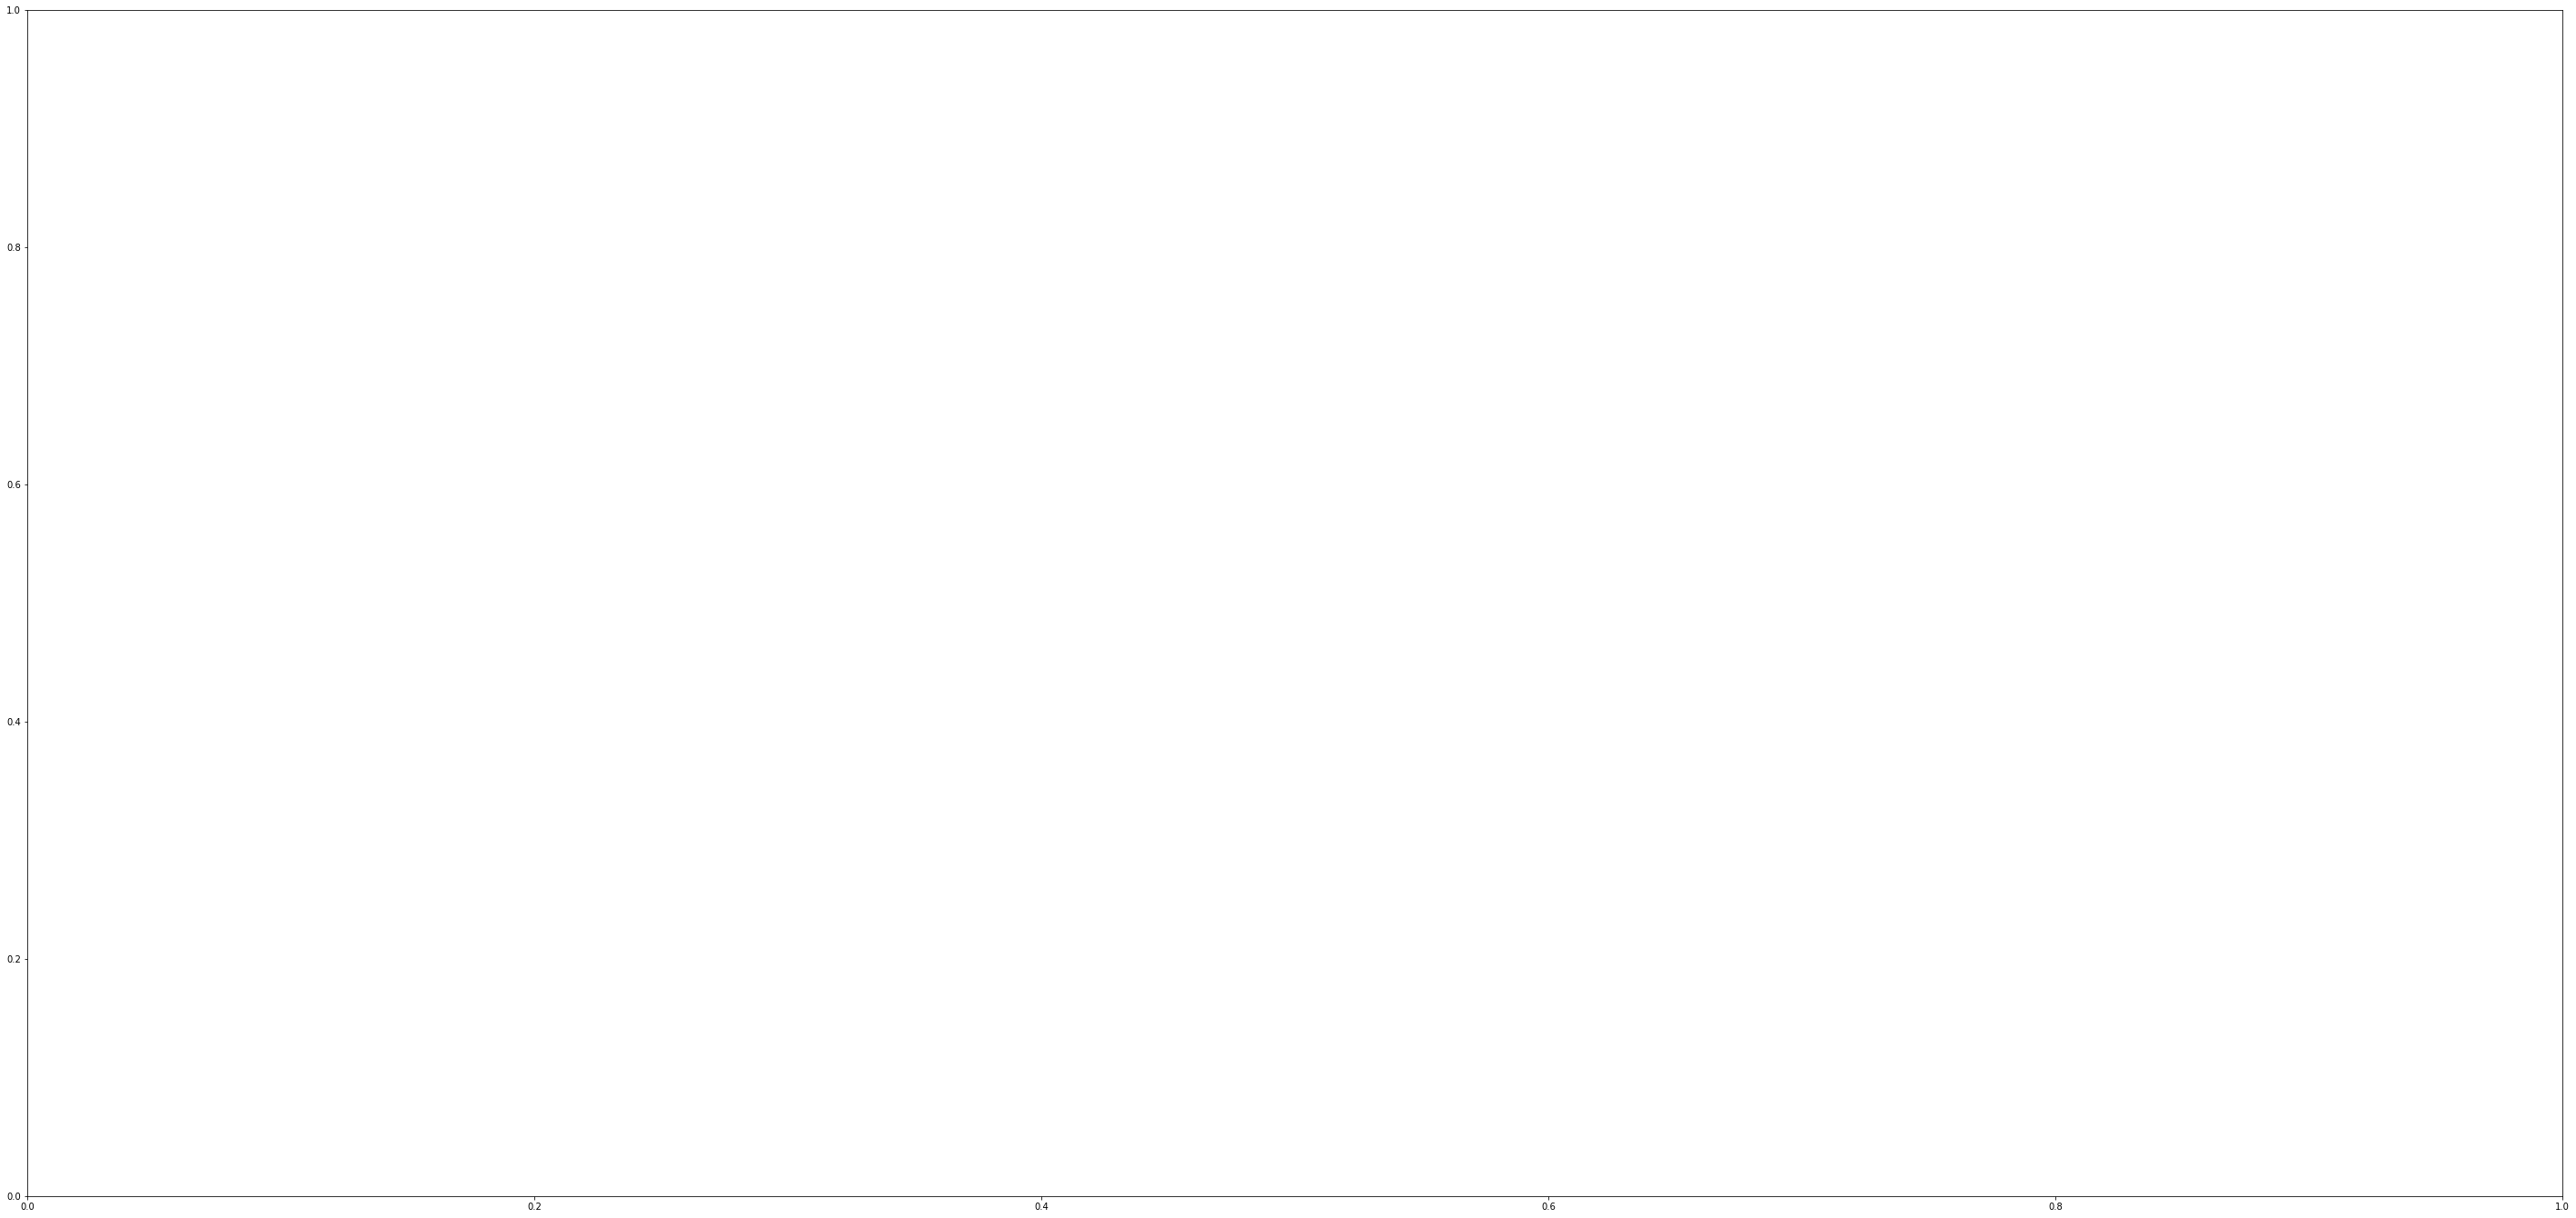

In [18]:
#fig, ax = plt.subplots(figsize=(50, 24))
#tree.plot_tree(dt)
#plt.savefig('tree_high_dpi')

In [35]:
# SkLearn Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_training, Y_training)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
#print(y_pred)
#print(explained_variance_score(y_pred, Y_test))

regressor.score(X_test, Y_test)
error_lin =  (abs(y_pred - Y_test)**2 / len(Y_test)).sum()
print(error_lin)

linear_explained_var = explained_variance_score(y_pred, Y_test)
print(linear_explained_var)

    

36257702111.53494
0.6020024016297016


In [41]:
x_var = []
y_var = []

x_varLog = []
y_varLog = []
means = {}
stds = {}
for e in df.keys():
    means[e] = df.mean(axis=0)[e]
    stds[e] = df.std(axis=0)[e]
#for i in range(len(df['id'])):
for i in range(1000):
    tempList = []
    
    tempListLog = []
    remove = False
    for e in df.keys():
        if(e == 'price'):
            y_var.append((df[e][i] - means[e]) / stds[e]) 
            y_varLog.append((df[e][i] - means[e]) / stds[e])
            if(abs((df[e][i] - means[e]) / stds[e]) ) > 3:
                remove = True
        else:
            tempList.append((df[e][i] - means[e]) / stds[e])
            
            tempListLog.append((df[e][i] - means[e]) / stds[e])
            if(abs((df[e][i] - means[e]) / stds[e]) ) > 3:
                remove = True
    if not remove:
        x_var.append(tempList)
        x_varLog.append(tempListLog)
theta = [1] * len(x_var[0])

thetaLog = [1] * len(x_var[0])
        
def firstGradient(thet, y, x,):
    gradient = [0] * len(x[0]) 
    for j in range(len(x[0])):
        for i in range(len(x)):
            gradient[j] += (y[i] - dotProduct(x[i], thet)) * x[i][j]
    return gradient

def firstGradientLog(thet, y, x,):
    gradient = [0] * len(x[0]) 
    for j in range(len(x[0])):
        for i in range(len(x)):
            gradient[j] += (y[i] - logisticProduct(x[i], thet)) * x[i][j]
    return gradient
def dotProduct(x_i, theta):
    sum = 0
    for j in range(len(x_i)):
        sum += x_i[j] * theta[j]
    return sum

def logisticProduct(x_i, theta):
    sum = 0
    for j in range(len(x_i)):
        sum += x_i[j] * theta[j]
    return (1/ (1 + (2.7183**-sum))) 

def vectorLength(v):
    sum = 0
    for i in v:
        sum += i ** 2
    return sum ** 0.5

def grafdientDecent(thet, y, x, alpha, error, it):
    
    gradient = [0] * len(x[0]) 
    for j in range(len(x[0])):
        for i in range(len(x)):
            gradient[j] += (y[i] - dotProduct(x[i], thet)) * x[i][j]
    for j in range(len(x[0])):
        thet[j] += (alpha * gradient[j])
    if vectorLength(gradient) > error:
        print (vectorLength(gradient))
        it=it+1
        return grafdientDecent(thet, y, x, alpha, error, it)
    else:
        print (it)
        return thet
    
def grafdientDecentLog(thet, y, x, alpha, error, it):
    
    gradient = [0] * len(x[0]) 
    for j in range(len(x[0])):
        for i in range(len(x)):
            gradient[j] += (y[i] - logisticProduct(x[i], thet)) * x[i][j]
    print (vectorLength(gradient))
    for j in range(len(x[0])):
        thet[j] += (alpha * gradient[j])
    if vectorLength(gradient) > error:
        it=it+1
        return grafdientDecentLog(thet, y, x, alpha, error, it)
    else:
        print (it)
        return thet

alpha = vectorLength(firstGradient(theta, y_var, x_var))
alphaLog = vectorLength(firstGradientLog(theta, y_varLog, x_varLog))
theta = [1] * len(x_var[0])
thetaLog = [-3] * len(x_varLog[0])

#theta = grafdientDecent(theta, y_var, x_var, 0.0000000001325* alpha,1000, 0)#for 10000

theta = grafdientDecent(theta, y_var, x_var, 0.0000000238* alpha,10, 0)# for 1000
thetaLog = grafdientDecentLog(thetaLog, y_var, x_var, 0.00001 * alphaLog,860, 0)# for 1000
print (theta)
print (thetaLog)
#print(grafdientDecent(theta, y_var, x_var, 0.000003067* alpha,10, 0))# for 100

8451.671084467976
3433.646158177346
2006.8567088847508
1395.662353374926
1041.4241636617892
817.8756880958631
672.211806821935
573.5603857232777
503.2012059165709
450.14480630798306
408.1009369658221
373.4706504802556
344.1410901473349
318.81240110958987
296.63644659556167
277.02540915864614
259.5495036131833
243.88077265200153
229.76081002949607
216.98116389425985
205.37070684854604
194.7870292981622
185.1102964581071
176.23870676641369
168.08504822369633
160.5740401371848
153.64025438438836
147.22647347226317
141.28238251494918
135.76351891978143
130.63042230581846
125.84794082283292
121.38466022006664
117.21242972939268
113.30596472700668
109.64251067036253
106.2015562966002
102.96458675613367
99.91486942336599
97.03726671635958
94.31807147773148
91.74486140475025
89.30636973349064
86.9923699311736
84.79357257216802
82.70153289724881
80.70856780617017
78.80768122850245
76.99249697071133
75.2571982590528
73.59647329580878
72.00546622655034
70.47973298281143
69.01520152099098
67.60813

In [42]:
x_var = []
y_var = []
means = {}
stds = {}
for e in df.keys():
    means[e] = df.mean(axis=0)[e]
    stds[e] = df.std(axis=0)[e]
for i in range(len(df['id'])):
    tempList = []
    for e in df.keys():
        if(e == 'price'):
            y_var.append((df[e][i] - means[e]) / stds[e]) 
        else:
            tempList.append((df[e][i] - means[e]) / stds[e])
    x_var.append(tempList)

def predict(x, thet):
    sum = 0
    for i in range(len(x)):
        sum+= x[i] * thet[i]
    return sum

def predictLog(x, thet):
    sum = 0
    for i in range(len(x)):
        sum+= x[i] * thet[i]
    return 1/ (1 + (2.7183**-sum))

def compare(i):
    pred = (predict(x_var[i], theta) * stds['price']) + means['price']
    pri = (y_var[i] * stds['price']) + means['price'];
    
    print("difference/price:", abs(pred-pri)/ pri , "price:", pri, "prediction", pred)
    return (pred-pri)**2
def compareLog(i):
    pred = (predictLog(x_var[i], thetaLog) * stds['price']) + means['price']
    pri = (y_var[i] * stds['price']) + means['price'];
    
    print("difference/price:", abs(pred-pri)/ pri , "price:", pri, "prediction", pred)
    return abs(pred-pri)**2
compare(2000)

difference/price: 0.4191808344428987 price: 470450.0 prediction 667653.6235636617


38889269146.63839

In [43]:
sum = 0
sumLog = 0
avrage = 0
sumAvrage = 0


for i in range(2000, 2100):
    avrage+= ((y_var[i] * stds['price']) + means['price'])/100
print (avrage)
for i in range(2000, 2100):
    sumAvrage += (avrage -((y_var[i] * stds['price']) + means['price']))**2 / 100
    sum += compare(i)/ 100
for i in range(2000, 2100):
    sumLog += compareLog(i)/ 100    
print("avrage offset Lin:   ", sum, " bsdhjfbsd")
print("avrage offset Log:   ", sumLog)
print("avrage offset avrage:", sumAvrage)

563456.9
difference/price: 0.4191808344428987 price: 470450.0 prediction 667653.6235636617
difference/price: 0.7722237435357409 price: 280000.0 prediction 496222.6481900074
difference/price: 1.6655614113182073 price: 176250.0 prediction 469805.19874483405
difference/price: 0.04630352782606039 price: 560000.0 prediction 534070.0244174062
difference/price: 0.37923537277902836 price: 830000.0 prediction 515234.64059340645
difference/price: 0.7436776502441492 price: 276900.0 prediction 482824.3413526049
difference/price: 0.2649965567873956 price: 625000.0 prediction 459377.15200787777
difference/price: 0.5629542441538155 price: 1015000.0 prediction 443601.44218387734
difference/price: 0.3948431578549195 price: 463500.0 prediction 646509.8036657552
difference/price: 0.1612770456694585 price: 485000.0 prediction 563219.3671496874
difference/price: 0.7849039876838865 price: 272000.0 prediction 485493.88465001713
difference/price: 0.764539278421509 price: 305000.0 prediction 538184.4799185602
